# Easy Money - Recomendation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

## Configurations

In [2]:
__POTENTIAL_CLIENTS_PATH__ = "../reports/potential_clients"
__POTENTIAL_CLIENTS_SAMPLE__ = "../reports/potential_clients_sample.csv"

RANDOM_STATE = 123
POTENTIAL_CLIENTS_TARGET_SIZE = 10000

## Functions

In [3]:
def one_hot_encode(dataframe: pd.DataFrame, column_name: str) -> pd.DataFrame:
    _dummy_dataset = pd.get_dummies(dataframe[column_name], prefix=column_name)
    return pd.concat([dataframe, _dummy_dataset], axis=1).drop([column_name], axis=1)


def encode_dataframe(dataframe: pd.DataFrame) -> pd.DataFrame:
    cat_columns = [col for col in dataframe.select_dtypes(exclude=[np.number, "datetime"]).columns]
    print(f"columns to encode: {cat_columns}")

    print(f"dataframe before one-hot encoding: {dataframe.shape}")
    for cat_col in cat_columns:
        dataframe = one_hot_encode(dataframe, cat_col)

    print(f"dataframe after one-hot encoding:  {dataframe.shape}")
    return dataframe

## Import data

In [4]:
dtypes = {'pk_cid': 'int64', 'active_customer': 'int8',
          'region_code': 'int8', 'gender': 'int8', 'age': 'int8', 'deceased': 'int8',
          'short_term_deposit': 'int8', 'loans': 'int8', 'mortgage': 'int8',
          'funds': 'int8', 'securities': 'int8', 'long_term_deposit': 'int8',
          'em_account_pp': 'int8', 'credit_card': 'int8', 'payroll': 'int8',
          'pension_plan': 'int8', 'payroll_account': 'int8', 'emc_account': 'int8',
          'debit_card': 'int8', 'em_account_p': 'int8', 'em_acount': 'int8',
          'entry_date_month': 'int8', 'entry_date_year': 'int8', 'entry_date_day': 'int8',
          'entry_date_week': 'int8', 'entry_date_weekday': 'int8', 'entry_date_trim': 'int8',
          'salary': 'float64', 'entry_channel_004': 'int8', 'entry_channel_007': 'int8',
          'entry_channel_013': 'int8', 'entry_channel_KAA': 'int8', 'entry_channel_KAB': 'int8',
          'entry_channel_KAD': 'int8', 'entry_channel_KAE': 'int8', 'entry_channel_KAF': 'int8',
          'entry_channel_KAG': 'int8', 'entry_channel_KAH': 'int8', 'entry_channel_KAI': 'int8',
          'entry_channel_KAJ': 'int8', 'entry_channel_KAK': 'int8', 'entry_channel_KAM': 'int8',
          'entry_channel_KAQ': 'int8', 'entry_channel_KAR': 'int8', 'entry_channel_KAS': 'int8',
          'entry_channel_KAT': 'int8', 'entry_channel_KAW': 'int8', 'entry_channel_KAY': 'int8',
          'entry_channel_KAZ': 'int8', 'entry_channel_KBE': 'int8', 'entry_channel_KBG': 'int8',
          'entry_channel_KBH': 'int8', 'entry_channel_KBO': 'int8', 'entry_channel_KBU': 'int8',
          'entry_channel_KBW': 'int8', 'entry_channel_KBY': 'int8', 'entry_channel_KBZ': 'int8',
          'entry_channel_KCB': 'int8', 'entry_channel_KCC': 'int8', 'entry_channel_KCH': 'int8',
          'entry_channel_KCI': 'int8', 'entry_channel_KCK': 'int8', 'entry_channel_KCL': 'int8',
          'entry_channel_KDA': 'int8', 'entry_channel_KDH': 'int8', 'entry_channel_KDR': 'int8',
          'entry_channel_KDS': 'int8', 'entry_channel_KDT': 'int8', 'entry_channel_KEH': 'int8',
          'entry_channel_KEJ': 'int8', 'entry_channel_KES': 'int8', 'entry_channel_KEY': 'int8',
          'entry_channel_KFA': 'int8', 'entry_channel_KFC': 'int8', 'entry_channel_KFD': 'int8',
          'entry_channel_KFF': 'int8', 'entry_channel_KFK': 'int8', 'entry_channel_KFL': 'int8',
          'entry_channel_KFP': 'int8', 'entry_channel_KFS': 'int8', 'entry_channel_KGC': 'int8',
          'entry_channel_KGN': 'int8', 'entry_channel_KGX': 'int8', 'entry_channel_KHC': 'int8',
          'entry_channel_KHD': 'int8', 'entry_channel_KHE': 'int8', 'entry_channel_KHF': 'int8',
          'entry_channel_KHK': 'int8', 'entry_channel_KHL': 'int8', 'entry_channel_KHM': 'int8',
          'entry_channel_KHN': 'int8', 'entry_channel_KHO': 'int8', 'entry_channel_KHP': 'int8',
          'entry_channel_KHQ': 'int8', 'entry_channel_KHS': 'int8', 'entry_channel_RED': 'int8',
          'entry_channel_UNKNOWN': 'int8', 'segment_00 - OTROS': 'int8',
          'segment_01 - TOP': 'int8', 'segment_02 - PARTICULARES': 'int8',
          'segment_03 - UNIVERSITARIO': 'int8', 'country_id_AR': 'int8', 'country_id_AT': 'int8',
          'country_id_BE': 'int8', 'country_id_BR': 'int8', 'country_id_CA': 'int8',
          'country_id_CH': 'int8', 'country_id_CI': 'int8', 'country_id_CL': 'int8',
          'country_id_CM': 'int8', 'country_id_CN': 'int8', 'country_id_CO': 'int8',
          'country_id_DE': 'int8', 'country_id_DJ': 'int8', 'country_id_DO': 'int8',
          'country_id_DZ': 'int8', 'country_id_ES': 'int8', 'country_id_ET': 'int8',
          'country_id_FR': 'int8', 'country_id_GA': 'int8', 'country_id_GB': 'int8',
          'country_id_GT': 'int8', 'country_id_HU': 'int8', 'country_id_IE': 'int8',
          'country_id_IT': 'int8', 'country_id_JM': 'int8', 'country_id_LU': 'int8',
          'country_id_MA': 'int8', 'country_id_MR': 'int8', 'country_id_MX': 'int8',
          'country_id_NO': 'int8', 'country_id_PE': 'int8', 'country_id_PL': 'int8',
          'country_id_PT': 'int8', 'country_id_QA': 'int8', 'country_id_RO': 'int8',
          'country_id_RU': 'int8', 'country_id_SA': 'int8', 'country_id_SE': 'int8',
          'country_id_SN': 'int8', 'country_id_US': 'int8', 'country_id_VE': 'int8',
          'prediction': 'int8', 'product_to_sale': 'str'}

parse_dates = ['pk_partition']

In [5]:
%%time
potential_client_files = os.listdir(__POTENTIAL_CLIENTS_PATH__)

df = None
for potential_client_file in potential_client_files:
    if df is None:
        df = pd.read_csv(f"{__POTENTIAL_CLIENTS_PATH__}/{potential_client_file}", dtype=dtypes, parse_dates=parse_dates)
    else:
        df = df.append(
            pd.read_csv(f"{__POTENTIAL_CLIENTS_PATH__}/{potential_client_file}", dtype=dtypes, parse_dates=parse_dates))

df.drop("Unnamed: 0", axis=1, inplace=True)
df["pk_partition"] = pd.to_datetime(df["pk_partition"])
df["product_to_sale"].value_counts()

Wall time: 597 ms


em_acount             4473
funds                 3311
debit_card            2369
long_term_deposit     2033
credit_card           2000
short_term_deposit    1863
emc_account           1316
securities             867
payroll_account        776
payroll                103
pension_plan            45
Name: product_to_sale, dtype: int64

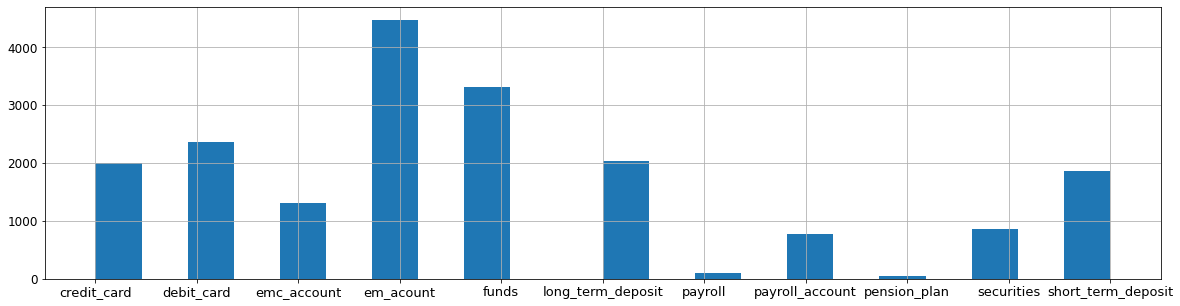

,cantidad,score_mean
product_to_sale,,
credit_card,2000,0.640841
debit_card,2369,0.583414
em_acount,4473,0.771579
emc_account,1316,0.661990
funds,3311,0.575638
long_term_deposit,2033,0.675352
payroll,103,0.539006
payroll_account,776,0.737084
pension_plan,45,0.694813


In [10]:
plt.figure(figsize=(20, 5))
df["product_to_sale"].hist(bins=22, xlabelsize=13, ylabelsize=12)
plt.show()
df.groupby(["product_to_sale"]).agg(
    cantidad = ("pk_cid", len),
    score_mean = ("score", np.mean),
)

## Filter best potential clients

In [12]:
df_filtered = df.copy(deep=True)
df_filtered = df_filtered[df_filtered["score"] > 0.60].reset_index(drop=True)
potential_filter_size = len(df_filtered)
print(f"Potenciales clientes que con mas de un 60% nos compraran un producto el proximo mes: {potential_filter_size}")
df_filtered[["pk_cid", "score", "product_to_sale"]]

Potenciales clientes que con mas de un 60% nos compraran un producto el proximo mes: 10803


,pk_cid,score,product_to_sale
0,100167,0.669042,credit_card
1,117575,0.668268,credit_card
2,124619,0.670978,credit_card
3,131601,0.643220,credit_card
4,135309,0.754430,credit_card
...,...,...,...
10798,1548342,0.605791,short_term_deposit
10799,1549211,0.647179,short_term_deposit
10800,1551116,0.618666,short_term_deposit
10801,1551363,0.640164,short_term_deposit


In [13]:
to_delete = abs(POTENTIAL_CLIENTS_TARGET_SIZE - potential_filter_size)
em_acount_to_delete = df_filtered[(df_filtered["score"] < 0.75) & (df_filtered["product_to_sale"] == "em_acount")]
em_acount_to_delete = em_acount_to_delete.sample(to_delete, random_state=RANDOM_STATE)
em_acount_to_delete[["pk_cid", "score", "product_to_sale"]]

,pk_cid,score,product_to_sale
5441,1324508,0.643537,em_acount
3632,1103174,0.648431,em_acount
6262,1537949,0.635248,em_acount
3500,1092089,0.634225,em_acount
3401,1082073,0.725955,em_acount
...,...,...,...
5349,1314945,0.634439,em_acount
4605,1218186,0.714513,em_acount
5561,1339342,0.617752,em_acount
5713,1358022,0.646025,em_acount


In [14]:
df_filtered = df_filtered.drop(em_acount_to_delete.index)
df_filtered

,pk_cid,credit_card,pk_partition,active_customer,region_code,gender,age,deceased,short_term_deposit,loans,...,country_id_RO,country_id_RU,country_id_SA,country_id_SE,country_id_SN,country_id_US,country_id_VE,prediction,score,product_to_sale
0,100167,0,2019-05-28,1,28,1,49,0,0,0,...,0,0,0,0,0,0,0,1,0.669042,credit_card
1,117575,0,2019-05-28,1,28,1,85,0,0,0,...,0,0,0,0,0,0,0,1,0.668268,credit_card
2,124619,0,2019-05-28,1,28,0,47,0,0,0,...,0,0,0,0,0,0,0,1,0.670978,credit_card
3,131601,0,2019-05-28,1,28,1,64,0,0,0,...,0,0,0,0,0,0,0,1,0.643220,credit_card
4,135309,0,2019-05-28,1,28,1,46,0,0,0,...,0,0,0,0,0,0,0,1,0.754430,credit_card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10798,1548342,0,2019-05-28,1,28,1,28,0,0,0,...,0,0,0,0,0,0,0,1,0.605791,short_term_deposit
10799,1549211,0,2019-05-28,1,46,0,30,0,0,0,...,0,0,0,0,0,0,0,1,0.647179,short_term_deposit
10800,1551116,0,2019-05-28,1,8,0,28,0,0,0,...,0,0,0,0,0,0,0,1,0.618666,short_term_deposit
10801,1551363,0,2019-05-28,1,28,1,29,0,0,0,...,0,0,0,0,0,0,0,1,0.640164,short_term_deposit


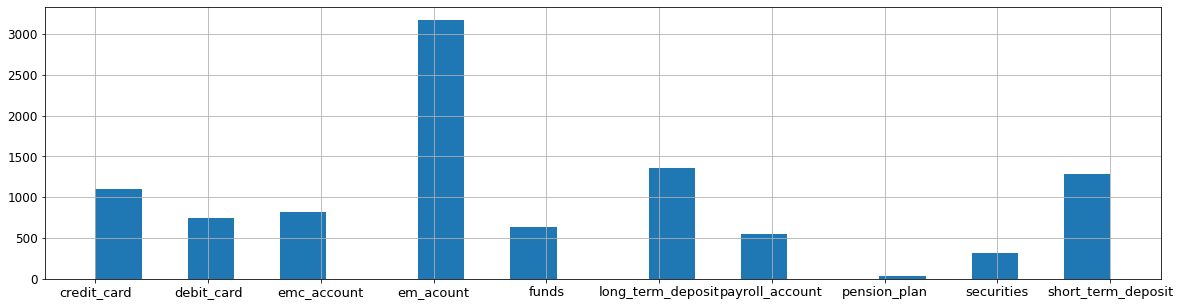

,cantidad,score_mean
product_to_sale,,
credit_card,1098,0.722669
debit_card,739,0.681305
em_acount,3171,0.829642
emc_account,814,0.737569
funds,631,0.700593
long_term_deposit,1358,0.739027
payroll_account,553,0.811714
pension_plan,34,0.739178
securities,313,0.674642


In [15]:
plt.figure(figsize=(20, 5))
df_filtered["product_to_sale"].hist(bins=22, xlabelsize=13, ylabelsize=12)
plt.show()
df_filtered.groupby(["product_to_sale"]).agg(
    cantidad = ("pk_cid", len),
    score_mean = ("score", np.mean),
)

## Muestra de 1000 potenciales clientes

In [11]:
potential_client_sample = df_filtered[["pk_cid", "product_to_sale"]].sample(1000).reset_index(drop=True)
potential_client_sample.columns = ["id_user", "segment"]
potential_client_sample.to_csv(__POTENTIAL_CLIENTS_SAMPLE__)
potential_client_sample

,id_user,segment
0,1395250,short_term_deposit
1,1123618,payroll_account
2,1106292,debit_card
3,1311270,em_acount
4,1281570,em_acount
...,...,...
995,1021291,long_term_deposit
996,1401572,funds
997,1543034,em_acount
998,1528818,credit_card


### Preparation for clustering

In [12]:
columns = ["gender", "age", "salary", "product_to_sale"]

In [13]:
df_prep = df_filtered.copy(deep=True)[columns]
df_prep

,gender,age,salary,product_to_sale
0,1,49,112364.220,credit_card
1,1,85,109728.990,credit_card
2,0,47,184387.770,credit_card
3,1,64,77477.565,credit_card
4,1,46,80876.880,credit_card
...,...,...,...,...
10798,1,28,57496.395,short_term_deposit
10799,0,30,119694.045,short_term_deposit
10800,0,28,57496.395,short_term_deposit
10801,1,29,146026.440,short_term_deposit


In [14]:
df_prep = encode_dataframe(df_prep)
print(f"""
columns = {list(df_prep.columns)}""")

columns to encode: ['product_to_sale']
dataframe before one-hot encoding: (10000, 4)
dataframe after one-hot encoding:  (10000, 13)

columns = ['gender', 'age', 'salary', 'product_to_sale_credit_card', 'product_to_sale_debit_card', 'product_to_sale_em_acount', 'product_to_sale_emc_account', 'product_to_sale_funds', 'product_to_sale_long_term_deposit', 'product_to_sale_payroll_account', 'product_to_sale_pension_plan', 'product_to_sale_securities', 'product_to_sale_short_term_deposit']


## Clustering

In [20]:
processed_df = df_prep.copy(deep=True)

In [21]:
%%time
pipeline = Pipeline(steps=[
    ("Scale", MinMaxScaler()),
    ("Clustering", KMeans(n_clusters=5, random_state=RANDOM_STATE))
])

pipeline.fit(processed_df)

Wall time: 187 ms


Pipeline(steps=[('Scale', MinMaxScaler()),
                ('Clustering', KMeans(n_clusters=5, random_state=123))])

In [22]:
processed_df["cluster"] = pipeline.predict(processed_df)
processed_df

,gender,age,salary,product_to_sale_credit_card,product_to_sale_debit_card,product_to_sale_em_acount,product_to_sale_emc_account,product_to_sale_funds,product_to_sale_long_term_deposit,product_to_sale_payroll_account,product_to_sale_pension_plan,product_to_sale_securities,product_to_sale_short_term_deposit,cluster
0,1,49,112364.220,1,0,0,0,0,0,0,0,0,0,1
1,1,85,109728.990,1,0,0,0,0,0,0,0,0,0,1
2,0,47,184387.770,1,0,0,0,0,0,0,0,0,0,0
3,1,64,77477.565,1,0,0,0,0,0,0,0,0,0,1
4,1,46,80876.880,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10798,1,28,57496.395,0,0,0,0,0,0,0,0,0,1,3
10799,0,30,119694.045,0,0,0,0,0,0,0,0,0,1,3
10800,0,28,57496.395,0,0,0,0,0,0,0,0,0,1,3
10801,1,29,146026.440,0,0,0,0,0,0,0,0,0,1,3


## Observation of results

In [23]:
cluster_gb = processed_df.groupby("cluster")

cluster_size = cluster_gb.size().to_frame()
cluster_size.columns = ["cluster_size"]

cluster_report = cluster_gb.agg(
    gender=("gender", np.mean),
    age_mean=("age", np.mean),
    age_mode=("age", lambda serie: np.round(serie.mode().iat[0], 2)),
    salary_mean=("salary", np.mean),

    # Inversion
    funds=('product_to_sale_funds', np.mean),
    pension_plan=('product_to_sale_pension_plan', np.mean),
    securities=('product_to_sale_securities', np.mean),
    long_term_deposit=('product_to_sale_long_term_deposit', np.mean),
    short_term_deposit=('product_to_sale_short_term_deposit', np.mean),

    # Cuentas
    em_acount=('product_to_sale_em_acount', np.mean),
    emc_account=('product_to_sale_emc_account', np.mean),
    payroll_account=('product_to_sale_payroll_account', np.mean),

    # Financiacion
    debit_card=('product_to_sale_debit_card', np.mean),
    credit_card=('product_to_sale_credit_card', np.mean)
)

cluster_report = cluster_size.T.append(cluster_report.T)
cluster_report

cluster,0,1,2,3,4
cluster_size,2396.000000,3384.000000,1358.000000,1289.000000,1573.000000
gender,0.000000,1.000000,0.445508,0.434445,0.000000
age_mean,43.492905,38.192376,54.887334,47.868891,32.069930
age_mode,33.000000,23.000000,50.000000,40.000000,23.000000
salary_mean,121837.270555,118848.816574,140513.094102,122441.909825,116731.968729
funds,0.139816,0.087470,0.000000,0.000000,0.000000
pension_plan,0.007095,0.005024,0.000000,0.000000,0.000000
securities,0.098915,0.022459,0.000000,0.000000,0.000000
long_term_deposit,0.000000,0.000000,1.000000,0.000000,0.000000
short_term_deposit,0.000000,0.000000,0.000000,1.000000,0.000000


In [24]:
cluster_report.style.background_gradient(cmap="BuGn", axis=1)

cluster,0,1,2,3,4
cluster_size,2396.000000,3384.000000,1358.000000,1289.000000,1573.000000
gender,0.000000,1.000000,0.445508,0.434445,0.000000
age_mean,43.492905,38.192376,54.887334,47.868891,32.069930
age_mode,33.000000,23.000000,50.000000,40.000000,23.000000
salary_mean,121837.270555,118848.816574,140513.094102,122441.909825,116731.968729
funds,0.139816,0.087470,0.000000,0.000000,0.000000
pension_plan,0.007095,0.005024,0.000000,0.000000,0.000000
securities,0.098915,0.022459,0.000000,0.000000,0.000000
long_term_deposit,0.000000,0.000000,1.000000,0.000000,0.000000
short_term_deposit,0.000000,0.000000,0.000000,1.000000,0.000000
